# Lab 4: Scikit Learn, Classification and Clustering

Deadline Tuesday 11/24/21  11:59 pm 

**scikit-learn** is a popular machine learning package that contains a variety of models and tools. 

All objects within scikitt-learn share a uniform common basic API consisting of 3 interfaces: an _estimator_ interface for building and fitting models, a _predictor_ interface for making predictions, and a _transformer_ interface for converting data.

>The _estimator_  interface defines object mechanism and a fit method for learning a model from training data. All supervised and unsupervised learning algorithms are offered as objects implementing this interface. Other machine learning tasks such as _feature extraction_, _feature selection_, and _dimensionality reduction_ are provided as _estimators_. 

For more information, check the scikit-learn API paper: [https://arxiv.org/pdf/1309.0238v1.pdf]

The general form of using models in scikit-learn:


```
clf = someModel( )
clf.fit(x_train , y_tain)
```

For Example: 

```
clf = LinearSVC( )
clf.fit(x_train , y_tain)
```

>The _predictor_ adds a predict method that takes an array x_test and produces predictions for x_test, based on the learned parameters of the _estimator_. In supervised learning, this method typically return predicted labels or values computed by the model. Some unsupervised learning estimators may also implement the predict interface, such as __k-means__, where the predicted values are the cluster labels.

```
clf.predict(x_test)
```

>_transform_ method is used to modify or filter data before feeding it to a learning algorithm. It takes some new data as input and outputs a transformed version of that data. Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as _transformers_ within the library. 

This is usually done with __fit_transform__ method. For example: 

```
PCA = RandomizedPCA (n_components = 2) 
x_train = PCA.fit_transform(x_train)
x_test = PCA.fit_transform(x_test)

```

In the example above, we first __fit__ the training set to find the PC components, then they are transformed. 

We can summarize the _estimator_ as follows:

* In _all estimators_
    - `model.fit()` : fit training data. In supervised learning, fit will take two parameters: the data x and labels y. In unsupervised learning, fit will take a single parameter: the data x

* In _supervised estimators_
    - `model.predict()` : predict the label of new test data for the given model. Predict takes one parameter: the new test data and returns the learned label for each item in the test data 
    - `model.score()` : Returns the score method for classification or regression methods.

* In _unsupervised estimators_

    - `model.transform()`: Tranform new data into new basis. Transform takes one parameter: new data and returns a new representation of that data based on the model
  
    

### Classification:  SVM 

Support Vector Machines (SVM) are among the most useful and powerful supervised learning algorithm. Here we are going to look at an example of using SVM models in scikit-learn. Then, it will be your turn to try this model.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

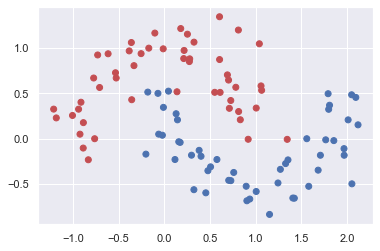

In [2]:
from sklearn.model_selection import train_test_split
# Import make_moons from scikit learn to generate synthetic data
from sklearn.datasets import make_moons


# 2d classification dataset
Xs , ys = make_moons( n_samples = 100,noise = 0.2 , random_state = 0)


# train-test split

Xs_train , Xs_test, ys_train, ys_test = train_test_split(Xs, ys , test_size = 0.15 )

#plot the data
colors = np.array(['r' , 'b'])
plt.scatter(Xs[:,0] , Xs[:,1]  ,c = colors[ys] )
plt.show()


We will perform both linear and nonlinear SVM on this synthetic dataset:

In [3]:
def meshGrid (x , y , h):
    '''x is data for x-axis meshgrid
       y is data for y-axis meshgrid
       h is stepsize
    '''
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() - 1 , y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx , yy

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.86      1.00      0.92         6

    accuracy                           0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15

[[8 1]
 [0 6]]


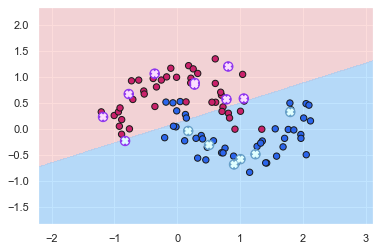

In [4]:
#Import SVM
from sklearn import svm

from matplotlib.colors import ListedColormap
from sklearn import metrics

cmap_light = ListedColormap(['#FBBBB9', '#5EFB6E', '#82CAFF'])
cmap_bold = ListedColormap(['#CA226B', '#387C44', '#2B65EC'])
cmap_test = ListedColormap(['#8E35EF', '#FFFF00', '#659EC7'])
# cmap_light = ListedColormap(['#FBBBB9', '#82CAFF']) 
# cmap_bold = ListedColormap(['#CA226B', '#2B65EC']) 
# cmap_test = ListedColormap(['#8E35EF', '#659EC7'])
cmap_predict = ListedColormap(['#FCDFFF', '#E0FFFF'])

# clf1 is a linear svm classifier
clf1 = svm.SVC(kernel = 'linear')

# Fit data
clf1.fit(Xs_train, ys_train)

# Predict
ys_predict = clf1.predict(Xs_test)


#Display the outcome of classification
print(metrics.classification_report(ys_test, ys_predict))
print(metrics.confusion_matrix(ys_test, ys_predict))

# Display the svm 
xx , yy = meshGrid(Xs[:,0], Xs[:,1], 0.01)



Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

# For plotting all data use the following line
#plt.scatter(Xs[:, 0], Xs[:, 1], c=ys, cmap=cmap_bold, edgecolor='k', s=50)

# For plotting train and test and prediction separatley 
plt.scatter(Xs_train[:, 0], Xs_train[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_predict, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
    

Now we apply a non-linear svm classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[9 0]
 [0 6]]


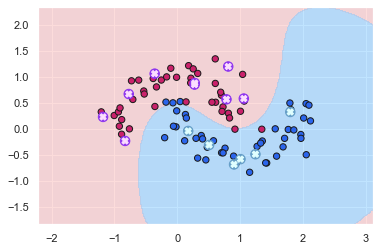

In [5]:
# clf2 is a nonlinear svm classifier

clf2 = svm.SVC(kernel = 'rbf')


# Fit data
clf2.fit(Xs_train, ys_train)

# Predict
ys_predict2 = clf2.predict(Xs_test)



#Display the outcome of classification
print(metrics.classification_report(ys_test, ys_predict2))
print(metrics.confusion_matrix(ys_test, ys_predict2))

# Display the svm 
xx , yy = meshGrid(Xs[:,0], Xs[:,1], 0.01)



Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

# For plotting all data use the following line
#plt.scatter(Xs[:, 0], Xs[:, 1], c=ys, cmap=cmap_bold, edgecolor='k', s=50)

# For plotting train and test and prediction separatley 
plt.scatter(Xs_train[:, 0], Xs_train[:, 1], c=ys_train, cmap=cmap_bold,edgecolor='k', s=40)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
plt.scatter(Xs_test[:, 0], Xs_test[:, 1], alpha=1.0,c = ys_predict2, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
    

### SVM on Wine quality dataset

#### Exercise 4.1 (30 pts)

Now it's your turn to work with SVM. The wine data set is loaded below. You can learn more about the dataset by using `datasett.DESCR`. Here, you need to work with the first two features to train your model.

* Select the first two features for your X
* Split the dataset in two sets of training and testing data. Use 80% of the data for training and 20% for testing
* Perform linear and non-linear SVM on the dataset 
* Display the classification report and accuracy for both models

In [6]:
from sklearn.datasets import load_wine

Xwine_full , ywine = load_wine(return_X_y = True)

#Your code here

print(Xwine_full.shape, ywine.shape)

(178, 13) (178,)


**Select the first two features for your X**

In [7]:
Xwine = Xwine_full[:, :2] #using first two fearures
Xwine.shape

(178, 2)

**Split the dataset in two sets of training and testing data. Use 80% of the data for training and 20% for testing**

In [8]:
X_train , X_test, y_train, y_test = train_test_split(Xwine, ywine , test_size = 0.20, random_state = 42)

* __plotting the data__

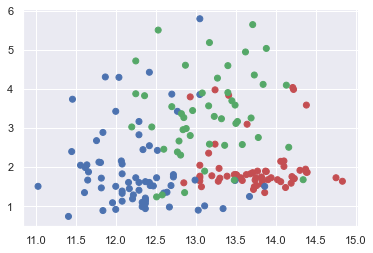

In [9]:
# plot the data
colors = np.array(['r' , 'b', 'g'])
plt.scatter(Xwine_full[:,0] , Xwine_full[:,1] , c = colors[ywine])
plt.show()

### Perform linear and non-linear SVM on the dataset

**Performing Linear SVM on dataset and displaying the classification report and accuracy**

In [10]:
# clf3 is a linear svm classifier
clf3 = svm.SVC(kernel = 'linear')

# Fit data
clf3.fit(X_train, y_train)

# Predict
y_predict = clf3.predict(X_test)

#Display the outcome of classification
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.92      0.86      0.89        14
           2       0.56      0.62      0.59         8

    accuracy                           0.78        36
   macro avg       0.75      0.76      0.75        36
weighted avg       0.79      0.78      0.78        36

[[11  0  3]
 [ 1 12  1]
 [ 2  1  5]]


**Performing Non-linear SVM on dataset and displaying the classification report and accuracy**

In [11]:
# clf4 is a nonlinear svm classifier

clf4 = svm.SVC(kernel = 'rbf')

# Fit data
clf4.fit(X_train, y_train)

# Predict
y_predict2 = clf4.predict(X_test)

#Display the outcome of classification
print(metrics.classification_report(y_test, y_predict2))
print(metrics.confusion_matrix(y_test, y_predict2))


              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.93      0.93      0.93        14
           2       0.56      0.62      0.59         8

    accuracy                           0.81        36
   macro avg       0.78      0.78      0.78        36
weighted avg       0.81      0.81      0.81        36

[[11  0  3]
 [ 0 13  1]
 [ 2  1  5]]


#### Exercise 4.2 (10 pts)

Scaling features is another step that can affect the performance of your classifier. For the wine data, scale the features using `StandardScaler` and perform linear SVM.  Display the classification report and accuracy. 
Did scaling data affect the classifier performance?

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Your code here
X_train , X_test, y_train, y_test = train_test_split(Xwine, ywine , test_size = 0.20, random_state = 42)

**Scaling the training data**

In [13]:
X_train_scaled=scaler.fit_transform(X_train)
# X_train_scaled

**Scaling the test data**

In [14]:
X_test_scaled=scaler.transform(X_test)
# X_test_scaled

**Performing linear SVM and displaying the classification report and accuracy on the scaled data**

In [15]:
# clf5 is a linear svm classifier
clf5 = svm.SVC(kernel = 'linear')

# Fit data
clf5.fit(X_train_scaled, y_train)

# Predict
y_predict = clf5.predict(X_test_scaled)

#Display the outcome of classification
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.92      0.86      0.89        14
           2       0.60      0.75      0.67         8

    accuracy                           0.81        36
   macro avg       0.79      0.80      0.79        36
weighted avg       0.82      0.81      0.81        36

[[11  0  3]
 [ 1 12  1]
 [ 1  1  6]]


__CONCLUSION__

* Scaling the data __improved__ the classifier performance

#### Exercise 4.3 (10 pts)

scikit-learn has many other classifiers. Pick another classifier of your choice ( KNN, DecisionTree, NaiveBayes, ...) and apply it to the wine dataset. Display the classification report and accuracy.

**Using Decision Tree Classifier**

In [16]:
#Your code goes here
from sklearn.tree import DecisionTreeClassifier

X_train , X_test, y_train, y_test = train_test_split(Xwine, ywine , test_size = 0.20, random_state=42)

# clf6 is a Decision Tree Classifier
clf6 = DecisionTreeClassifier()

# Fit data
clf6.fit(X_train, y_train)

# Predict
y_predict = clf6.predict(X_test)

#Display the outcome of classification
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.86      0.86      0.86        14
           2       0.64      0.88      0.74         8

    accuracy                           0.81        36
   macro avg       0.80      0.82      0.80        36
weighted avg       0.83      0.81      0.81        36

[[10  2  2]
 [ 0 12  2]
 [ 1  0  7]]


**Using Random Forest Classifier**

In [17]:
from sklearn.ensemble import RandomForestClassifier

# clf7 is a Random Forest Classifier
clf7 = RandomForestClassifier()

# Fit data
clf7.fit(X_train, y_train)

# Predict
y_predict = clf7.predict(X_test)

#Display the outcome of classification
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.87      0.93      0.90        14
           2       0.73      1.00      0.84         8

    accuracy                           0.86        36
   macro avg       0.86      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36

[[10  2  2]
 [ 0 13  1]
 [ 0  0  8]]


### Clustering

You have already seen an example of clustering using scikit-learn in lecture. In this section, you will apply `KMeans` algorithm to the wine dataset.

#### Exercise 4.4 ( 30 pts)
* First choose the first two features and apply kmeans clustering.
* Display cluster evaluation metrics`homogeneity_score` and `completeness_score` (both belong to sklearn.metrics)
* Plot the clusters and centroids. You have the "ground truth" or labels of your data points, your plot should create a meshgrid to display the decision boundary of your model, and add the datapoints and their true labels. ( This is to observe how good your model performs on the data)

Note: For displaying decision boundaries and data points follow these steps:

1. Use meshGrid function to get the mesh for your attributes
2. Obtain labels for each point in mesh and reshape it. ( Z = kmeans.predict(....))
3. Put the results into a color plot
    * Plot the colormesh --> plt.pcolormesh
    * Plot your data points --> plt.scatter
    * Plot the centroids --> plt.scatter
    * Set titles, x and y ranges
    * plt.show()

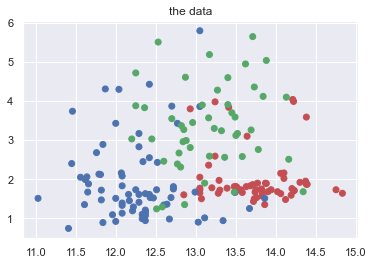

In [18]:
from sklearn.cluster import KMeans

Xwine_full , ywine = load_wine(return_X_y = True)

Xc = Xwine_full [:, :2] #using first 2 features

colormap = np.array(['r' , 'b' , 'g'])
plt.scatter(Xc[:,0],Xc[:,1] , c = colormap[ywine])
plt.title("the data");
plt.show()


**First choose the first two features and apply kmeans clustering.**

In [19]:
# Your code here
kmeans = KMeans(n_clusters = 3, init ='random' , random_state = 200 , verbose =False).fit(Xc)
y_pred = kmeans.predict(Xc)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       1, 2])

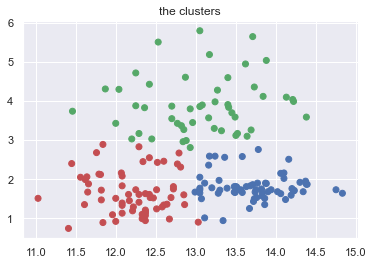

In [20]:
plt.scatter(Xc[:,0], Xc[:,1], c = colormap[y_pred])
plt.title("the clusters");

**Display cluster evaluation metrics homogeneity_score and completeness_score (both belong to sklearn.metrics)**

In [21]:
from sklearn.metrics import completeness_score, homogeneity_score

# Evaluating the performance 
print('Completeness Score  :', completeness_score(ywine, y_pred))
print('Homogeneity_Score :', homogeneity_score(ywine, y_pred))


Completeness Score  : 0.4080524820388843
Homogeneity_Score : 0.41035077970969713


**Plot the clusters and centroids. You have the "ground truth" or labels of your data points, your plot should create a meshgrid to display the decision boundary of your model, and add the datapoints and their true labels. ( This is to observe how good your model performs on the data)**

In [22]:
display(kmeans.labels_)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       1, 2])

In [23]:
display(kmeans.cluster_centers_)

array([[12.21349206,  1.6531746 ],
       [13.71538462,  1.79969231],
       [13.0632    ,  3.8948    ]])

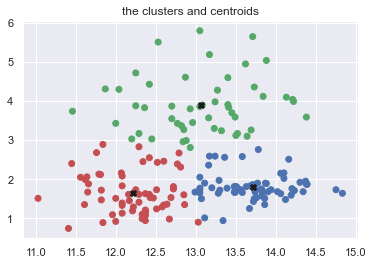

In [24]:
plt.scatter(Xc[:,0], Xc[:,1], c = colormap[kmeans.labels_])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1] , c = 'k' , marker = 'X' , linewidths = 1)
plt.title("the clusters and centroids");

**Draw decision boundaries**

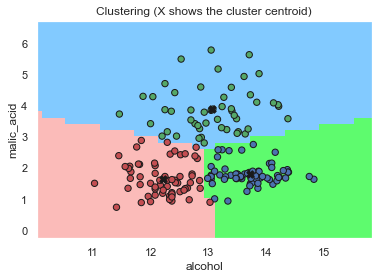

In [25]:
# make the meshgrid
xx , yy = meshGrid(Xc[:,0], Xc[:,1], 0.2)

# add the classifier to the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the outcome
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light, shading='auto')
plt.scatter(Xc[:, 0], Xc[:, 1], c = colormap[kmeans.labels_], edgecolor = 'k', s = 40)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'k', marker = 'X' , linewidths = 1, s = 55)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("alcohol")
plt.ylabel("malic_acid")
plt.title("Clustering (X shows the cluster centroid)");

#### Exercise 4.5 (20 pts)

In the previous model you used the first two features: 'Alcohol' and 'Malic acid'. 
For this exercise, pick features 'Alcohol' and 'OD280/OD315 of diluted wines' (feature #1 and feature #12) as your
two attributes and perform the tasks in Exercise 4.4. (cluster, report metrics, draw decision boundaries)

Which model performs better?

**Picking features 'Alcohol' and 'OD280/OD315 of diluted wines'**

In [26]:
# your code here
Xc = Xwine_full[:, [0,11]] #using (feature #1 and feature #12)
# Xc

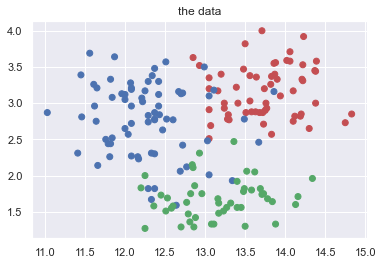

In [27]:
#Plotting the data
colormap = np.array(['r' , 'b' , 'g'])
plt.scatter(Xc[:,0],Xc[:,1] , c = colormap[ywine])
plt.title("the data");
plt.show()

**Applying kmeans clustering.**

In [28]:
# Your code here
kmeans = KMeans(n_clusters = 3, init ='random' , random_state = 200 , verbose =False).fit(Xc)
y_pred = kmeans.predict(Xc)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0,
       1, 0, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

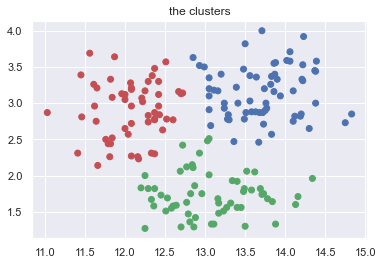

In [29]:
plt.scatter(Xc[:,0], Xc[:,1], c = colormap[y_pred])
plt.title("the clusters");

**Display cluster evaluation metrics homogeneity_score and completeness_score**

In [30]:
from sklearn.metrics import completeness_score, homogeneity_score

# Evaluating the performance 
print('Completeness Score  :', completeness_score(ywine, y_pred))
print('Homogeneity_Score :', homogeneity_score(ywine, y_pred))


Completeness Score  : 0.7006853440435565
Homogeneity_Score : 0.7072039236692641


**Plot the clusters and centroids.**

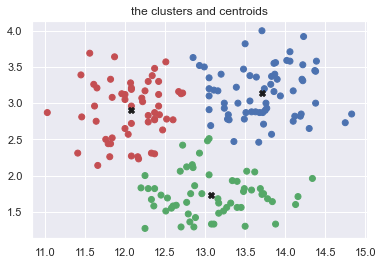

In [31]:
plt.scatter(Xc[:,0], Xc[:,1], c = colormap[kmeans.labels_], cmap = cmap_light)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1] , c = 'k', marker = 'X' , linewidths = 1)
plt.title("the clusters and centroids");

**Draw decision boundaries**

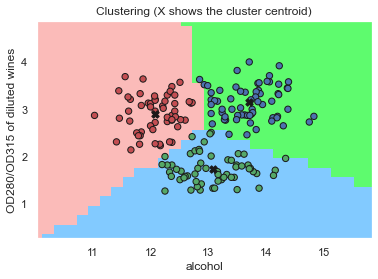

In [32]:
# make the meshgrid
xx , yy = meshGrid(Xc[:,0], Xc[:,1], 0.2)

# add the classifier to the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the outcome
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light, shading='auto')
plt.scatter(Xc[:, 0], Xc[:, 1], c = colormap[kmeans.labels_], edgecolor = 'k', s = 40)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'k', marker = 'X' , linewidths = 1, s = 55)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("alcohol")
plt.ylabel("OD280/OD315 of diluted wines")
plt.title("Clustering (X shows the cluster centroid)");

A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.

Both scores have positive values between 0.0 and 1.0, __larger values__ being desirable.

__CONCLUSION__

The model using features 'Alcohol' and 'OD280/OD315 of diluted wines' has a better homogeneity and completeness score than the model using the first two features and thus the model using features 'Alcohol' and 'OD280/OD315 of diluted wines' __performs better__ .